# 31. Building Neural Network for Regression Problem

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics:

#### Number of Instances:

20640

#### number of Atributes:

8 numeric, predictive attributes and the target

#### Atribute Information

+ __MedInc__: median income in block
+ __HouseAge__: median house age in block
+ __AveRooms__: average number of rooms
+ __AveBedrms__: average number of bedrooms
+ __Population__: block pupulation
+ __AveOccup__: average house occupancy
+ __Latitude__: house block latitude
+ __Longitude__: house block longitude

#### Target

The median house value in units of 100,000 for California districts

#### Documentation


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


In [10]:
# Show classes
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Train Test Split - Documentation

Split arrays or matrices into random train and test subsets.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [13]:
from sklearn.model_selection import train_test_split

#train_test_split(DatosEntrada, SalidaEsperada, semilla)

# Separa los datos en conjunto(set) de entramiento y de comprobacion(test)
# tanto para entrada como salida esperada
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# Separa los datos del conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validacion
# tanto para entrada como para salida esperada
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

#### Standar Scaler - Documentation

Standardize features by removing the mean and scaling to unit variance.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [16]:
from sklearn.preprocessing import StandardScaler

# We want all the variables with mean zero and their variance as one
scaler = StandardScaler() # obj

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [17]:
# Establecemos las semillas para poder reproducir otras veces los resultados
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
X_train.shape

(11610, 8)

#### Structure of our NN

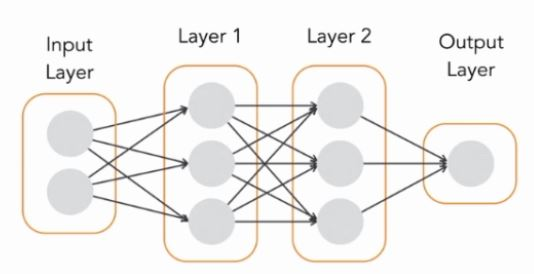

In [19]:
from IPython.display import Image
Image("../S10 - Python - Building and Trainning the Model/images/sequential_api.jpg", height=400, width=400)

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), # tenemos 8 atributos iniciales
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

# Otra forma de poner la primera capa, la de los atributos (clases)
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


#### Compilar modelo - Documentacion

https://keras.io/api/models/model_training_apis/

In [23]:
model.compile(loss="mean_squared_error",             # Por usar Regresion
             optimizer=keras.optimizers.SGD(lr=1e-3),# Stocastic Gradient Descent, learning rate
             metrics=['mae'])                        # mean absolute error

In [34]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3975 - mae: 0.4530 - val_loss: 25828.2281 - val_mae: 150.0061
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3951 - mae: 0.4520 - val_loss: 25294.1794 - val_mae: 148.7278
Epoch 3/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3927 - mae: 0.4495 - val_loss: 24273.6706 - val_mae: 146.5988
Epoch 4/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3906 - mae: 0.4484 - val_loss: 21437.6079 - val_mae: 139.1847
Epoch 5/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3887 - mae: 0.4470 - val_loss: 22678.0986 - val_mae: 142.9872
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3864 - mae: 0.4447 - val_loss: 22302.9386 - val_mae: 142.1496
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 

In [35]:
mae_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
model_history.history

{'loss': [1.837262098394931,
  0.7879865282779105,
  0.679706215827656,
  0.6261999648106088,
  0.5843461900615774,
  0.5489396460245233,
  0.5206021656875052,
  0.49838287375488743,
  0.4797448597829163,
  0.4646282413568505,
  0.4523978711201342,
  0.4424626237046195,
  0.4339581448491743,
  0.42721527446250684,
  0.4208878380383632,
  0.41544756438586344,
  0.4112559688902435,
  0.4069490449167756,
  0.4037323595838851,
  0.40039607783928705],
 'mae': [0.9957214,
  0.6680291,
  0.61561346,
  0.5878571,
  0.56577533,
  0.54633594,
  0.5326866,
  0.51812977,
  0.50803775,
  0.49798253,
  0.49017185,
  0.48368585,
  0.47774106,
  0.47384167,
  0.46946892,
  0.4659215,
  0.46242127,
  0.45960185,
  0.45782474,
  0.45538393],
 'val_loss': [375059.9920219638,
  175415.15294735142,
  135039.6378229974,
  109047.98038194445,
  99452.78827115633,
  78253.42960271318,
  75454.88110465117,
  63990.31364260336,
  54465.917314680235,
  54673.84112160853,
  52983.62359294251,
  40930.84918645026,

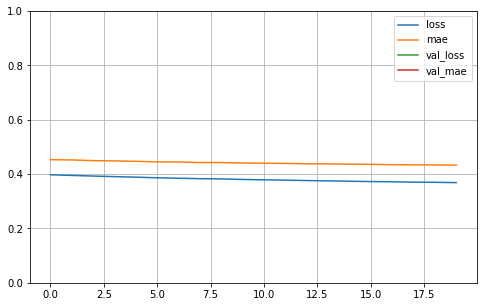

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [37]:
# Crear nuevos datos (como si lo fueran)
X_new = X_test[:3]

In [38]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[134.73198]
 [144.73961]
 [147.31706]]
[0.477   0.458   5.00001]
